In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!pip install pydub

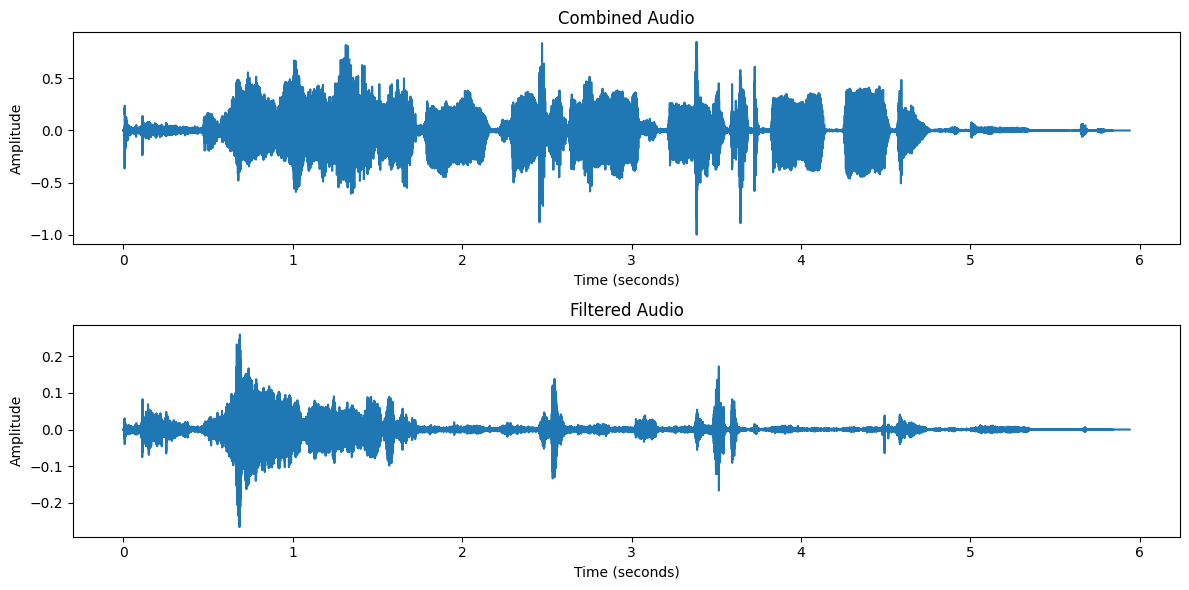

In [ ]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
from IPython.display import Audio

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Sample usage:
fs, combined_audio = wavfile.read('overlapped_audio.wav')  # Read the combined audio file
combined_audio = combined_audio / np.max(np.abs(combined_audio), axis=0)  # Normalize

# Set the filter parameters
lowcut = 2000  # Replace with the lower frequency of interest (normalized)
highcut = 3000  # Replace with the higher frequency of interest (normalized)

# Apply bandpass filter to the combined audio data
filtered_audio = butter_bandpass_filter(combined_audio, lowcut, highcut, fs)

# Time axis
time = np.arange(0, len(combined_audio)) / fs

# Plot the combined audio
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, combined_audio)
plt.title('Combined Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Plot the filtered audio
plt.subplot(2, 1, 2)
plt.plot(time, filtered_audio)
plt.title('Filtered Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import scipy.io.wavfile as wav

# Set parameters
duration = 5  # seconds
sampling_rate = 8000  # Hz

# Generate two sine waves with different frequencies
frequency1 = 200  # Hz (frequency of the first sine wave)
frequency2 = 200  # Hz (frequency of the second sine wave)

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
audio_data1 = 0.5 * np.cos(2 * np.pi * frequency1 * t)
audio_data2 = 0.5 * np.sin(2 * np.pi * frequency2 * t)

# Combine the two sine waves
combined_audio_data = audio_data1 + audio_data2

# Normalize to 16-bit PCM format
normalized_audio_data = np.int16(combined_audio_data * 32767)

# Save the generated audio as a WAV file
wav.write('combined_audio.wav', sampling_rate, normalized_audio_data)


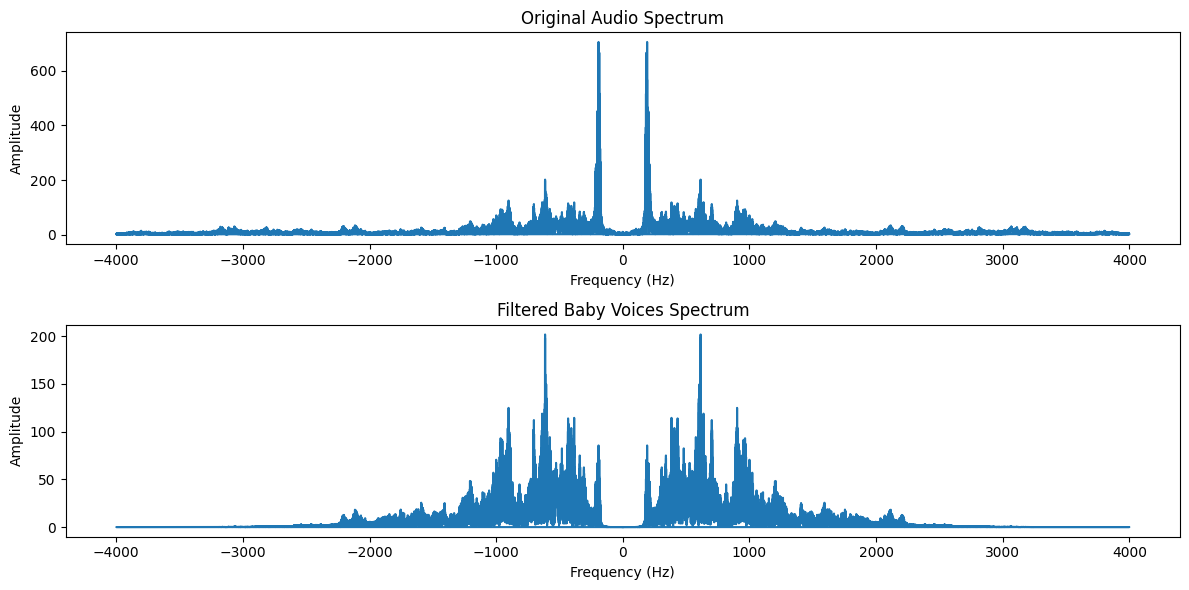

In [ ]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Sample usage:
fs, combined_audio = wavfile.read('overlapped_audio.wav')  # Read the combined audio file
combined_audio = combined_audio / np.max(np.abs(combined_audio), axis=0)  # Normalize

# Set the filter parameters
lowcut_baby = 300  # Example: baby voices might be in the range of 300 Hz to 2000 Hz
highcut_baby = 2000

# Apply bandpass filter to the combined audio data
filtered_audio_baby = butter_bandpass_filter(combined_audio, lowcut_baby, highcut_baby, fs)

# Time axis
time = np.arange(0, len(combined_audio)) / fs

# Compute FFT for original and filtered signals
fft_original = np.fft.fft(combined_audio)
fft_filtered_baby = np.fft.fft(filtered_audio_baby)

# Frequency axis
freq = np.fft.fftfreq(len(fft_original), d=1/fs)

# Plot the spectra
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq, np.abs(fft_original))
plt.title('Original Audio Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_filtered_baby))
plt.title('Filtered Baby Voices Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [ ]:
Audio(filtered_audio  , rate=fs)

In [ ]:
from IPython.display import Audio
Audio(overlapped_audio, rate=fs)

In [ ]:
from IPython.display import Audio
Audio(audio_wav_normalized, rate=fs)

In [ ]:
#both wav files

from scipy.io import wavfile
import numpy as np

# Function to overlap two audio files

# Read the audio files
fs1, audio1 = wavfile.read('/content/gdrive/MyDrive/Rekovar data/Combined/02c3b725-26e4-4a2c-9336-04ddc58836d9-1430726196216-1.7-m-04-hu.wav')
fs2, audio2 = wavfile.read('/content/gdrive/MyDrive/Rekovar data/Combined/04c3386b-e6bc-4bd0-8456-d46ae21a73fc-1435305829013-1.7-f-26-hu.wav')

# Ensure both audio files have the same sampling rate
if fs1 != fs2:
    raise ValueError("Both audio files must have the same sampling rate.")

# Normalize the audio data to the range [-1, 1]
audio1 = audio1 / np.max(np.abs(audio1), axis=0)
audio2 = audio2 / np.max(np.abs(audio2), axis=0)

# Trim or zero-pad the shorter audio to match the length of the longer audio
min_length = min(len(audio1), len(audio2))
audio1 = audio1[:min_length]
audio2 = audio2[:min_length]

# Set the overlap duration (in samples)
overlap_duration = min_length

# Create a linear ramp for overlap blending
ramp = np.linspace(0, 1, overlap_duration)

# Apply the ramp to both audios for a smooth transition
audio1[-overlap_duration:] *= 1 - ramp
audio2[:overlap_duration] *= ramp

# Combine the audios
overlapped_audio = audio1 + audio2

# Save the overlapped audio to a new file
wavfile.write('overlapped_audio.wav', fs1, overlapped_audio)


In [ ]:
from scipy.io import wavfile
import numpy as np
from pydub import AudioSegment

# Function to overlap two audio files

# Read the WAV file
fs1, audio1 = wavfile.read('/content/gdrive/MyDrive/Rekovar data/Combined/02c3b725-26e4-4a2c-9336-04ddc58836d9-1430726196216-1.7-m-04-hu.wav')

# Read the MP3 file using pydub
audio2 = AudioSegment.from_mp3('/content/gdrive/MyDrive/Rekovar data/en/clips/common_voice_en_33158900.mp3')

# Ensure both audio files have the same sampling rate
if fs1 != audio2.frame_rate:
    raise ValueError("Both audio files must have the same sampling rate.")

# Convert audio2 to numpy array
audio2 = np.array(audio2.get_array_of_samples())

# Normalize the audio data to the range [-1, 1]
audio1 = audio1 / np.max(np.abs(audio1), axis=0)
audio2 = audio2 / np.max(np.abs(audio2), axis=0)

# Trim or zero-pad the shorter audio to match the length of the longer audio
min_length = min(len(audio1), len(audio2))
audio1 = audio1[:min_length]
audio2 = audio2[:min_length]

# Set the overlap duration (in samples)
overlap_duration = min_length

# Create a linear ramp for overlap blending
ramp = np.linspace(0, 1, overlap_duration)

# Apply the ramp to both audios for a smooth transition
audio1[-overlap_duration:] *= 1 - ramp
audio2[:overlap_duration] *= ramp

# Combine the audios
overlapped_audio = audio1 + audio2

# Save the overlapped audio to a new file
wavfile.write('overlapped_audio.wav', fs1, overlapped_audio)


In [ ]:
from scipy.io import wavfile
import numpy as np
from pydub import AudioSegment

# Function to overlap two audio files

# Read the WAV file
fs1, audio1 = wavfile.read('/content/gdrive/MyDrive/Rekovar data/Combined/02c3b725-26e4-4a2c-9336-04ddc58836d9-1430726196216-1.7-m-04-hu.wav')

# Read the MP3 file using pydub
audio2 = AudioSegment.from_mp3('/content/gdrive/MyDrive/Rekovar data/en/clips/common_voice_en_33164035.mp3')

# Ensure both audio files have the same sampling rate
if fs1 != audio2.frame_rate:
    # Resample the MP3 file to match the sampling rate of the WAV file
    audio2 = audio2.set_frame_rate(fs1)

# Convert audio2 to numpy array
audio2 = np.array(audio2.get_array_of_samples())

# Normalize the audio data to the range [-1, 1]
audio1 = audio1 / np.max(np.abs(audio1), axis=0)
audio2 = audio2 / np.max(np.abs(audio2), axis=0)

# Trim or zero-pad the shorter audio to match the length of the longer audio
min_length = min(len(audio1), len(audio2))
audio1 = audio1[:min_length]
audio2 = audio2[:min_length]

# Set the overlap duration (in samples)
overlap_duration = min_length

# Create a linear ramp for overlap blending
ramp = np.linspace(0, 1, overlap_duration)

# Apply the ramp to both audios for a smooth transition
audio1[-overlap_duration:] *= 1 - ramp
audio2[:overlap_duration] *= ramp

# Combine the audios
overlapped_audio = audio1 + audio2

# Save the overlapped audio to a new file
wavfile.write('overlapped_audio.wav', fs1, overlapped_audio)


In [ ]:
#Normalize wav and mp3 then overlap

from scipy.io import wavfile
import numpy as np
from pydub import AudioSegment

# Function to overlap two audio files

# Read the WAV file
fs1, audio1 = wavfile.read('/content/gdrive/MyDrive/Rekovar data/Combined/02c3b725-26e4-4a2c-9336-04ddc58836d9-1430726196216-1.7-m-04-hu.wav')

# Read the MP3 file using pydub
audio2 = AudioSegment.from_mp3('/content/gdrive/MyDrive/Rekovar data/en/clips/common_voice_en_33164035.mp3')

# Ensure both audio files have the same sampling rate
if fs1 != audio2.frame_rate:
    # Resample the MP3 file to match the sampling rate of the WAV file
    audio2 = audio2.set_frame_rate(fs1)

# Convert audio2 to numpy array
audio2 = np.array(audio2.get_array_of_samples())

# Normalize the audio data to the range [-1, 1]
audio1 = audio1 / np.max(np.abs(audio1), axis=0)
audio2 = audio2 / np.max(np.abs(audio2), axis=0)

# Normalize both audio signals separately
audio1 /= np.max(np.abs(audio1))
audio2 /= np.max(np.abs(audio2))

# Trim or zero-pad the shorter audio to match the length of the longer audio
min_length = min(len(audio1), len(audio2))
audio1 = audio1[:min_length]
audio2 = audio2[:min_length]

# Set the overlap duration (in samples)
overlap_duration = min_length

# Create a linear ramp for overlap blending
ramp = np.linspace(0, 1, overlap_duration)

# Apply the ramp to both audios for a smooth transition
audio1[-overlap_duration:] *= 1 - ramp
audio2[:overlap_duration] *= ramp

# Combine the normalized and overlapped audios
overlapped_audio_norm = audio1 + audio2

# Save the overlapped audio to a new file
wavfile.write('overlapped_audio_normalized.wav', fs1, overlapped_audio_norm)


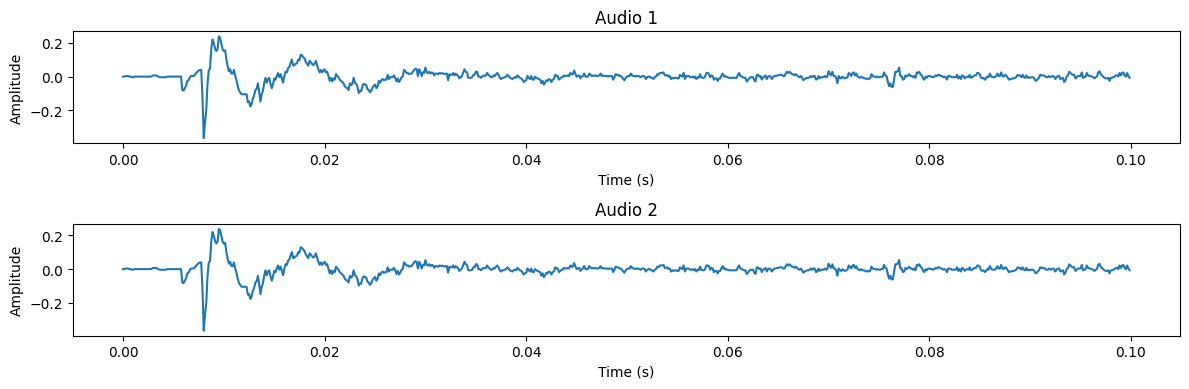

In [ ]:
#visualize the audio signals in time domain

import matplotlib.pyplot as plt
import numpy as np

# Read the WAV files
fs1, audio1 = wavfile.read('overlapped_audio_normalized.wav')
fs2, audio2 = wavfile.read('overlapped_audio.wav')

# Normalize the audio data to the range [-1, 1]
audio1_normalized = audio1 / np.max(np.abs(audio1), axis=0)
audio2_normalized = audio2 / np.max(np.abs(audio2), axis=0)

# Trim or zero-pad the first 10 milliseconds
samples_to_visualize = int(fs1 * 0.1)  # 10ms
audio1_trimmed = audio1_normalized[:samples_to_visualize]
audio2_trimmed = audio2_normalized[:samples_to_visualize]

# Create time axis
time_axis = np.arange(0, len(audio1_trimmed)) / fs1

# Plot the waveforms
plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
plt.plot(time_axis, audio1_trimmed)
plt.title('Audio 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time_axis, audio2_trimmed)
plt.title('Audio 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

# Read the WAV files
fs1, audio1 = wavfile.read('overlapped_audio_normalized.wav')
fs2, audio2 = wavfile.read('overlapped_audio.wav')

# Normalize the audio data to the range [-1, 1]
audio1_normalized = audio1 / np.max(np.abs(audio1), axis=0)
audio2_normalized = audio2 / np.max(np.abs(audio2), axis=0)

# Trim or zero-pad the first 10 milliseconds
samples_to_visualize = int(fs1 * 0.01)  # 10ms
audio1_trimmed = audio1_normalized[:samples_to_visualize]
audio2_trimmed = audio2_normalized[:samples_to_visualize]

# Create time axis
time_axis = np.arange(0, len(audio1_trimmed)) / fs1

# Compute FFT for both signals
fft_audio1 = np.fft.fft(audio1_trimmed)
fft_audio2 = np.fft.fft(audio2_trimmed)

# Frequency axis
freq = np.fft.fftfreq(samples_to_visualize, d=1/fs1)

# Plot the spectra
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq, np.abs(fft_audio1))
plt.title('Audio 1 Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_audio2))
plt.title('Audio 2 Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from pydub import AudioSegment

# Read the WAV file
fs1, audio1 = wavfile.read('/content/gdrive/MyDrive/Rekovar data/Combined/02c3b725-26e4-4a2c-9336-04ddc58836d9-1430726196216-1.7-m-04-hu.wav')

# Read the MP3 file using pydub
audio2 = AudioSegment.from_mp3('/content/gdrive/MyDrive/Rekovar data/en/clips/common_voice_en_33164035.mp3')

# Convert audio2 to numpy array
audio2 = np.array(audio2.get_array_of_samples())

# Normalize the audio data to the range [-1, 1]
audio1_normalized = audio1 / np.max(np.abs(audio1), axis=0)
audio2_normalized = audio2 / np.max(np.abs(audio2), axis=0)

# Trim or zero-pad the first 10 milliseconds
samples_to_visualize = int(fs1 * 0.01)  # 10ms
audio1_trimmed = audio1_normalized[:samples_to_visualize]
audio2_trimmed = audio2_normalized[:samples_to_visualize]

# Create time axis
time_axis = np.arange(0, len(audio1_trimmed)) / fs1

# Compute FFT for both signals
fft_audio1 = np.fft.fft(audio1_trimmed)
fft_audio2 = np.fft.fft(audio2_trimmed)

# Frequency axis
freq = np.fft.fftfreq(samples_to_visualize, d=1/fs1)

# Plot the spectra
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq, np.abs(fft_audio1))
plt.title('WAV Audio Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_audio2))
plt.title('MP3 Audio Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


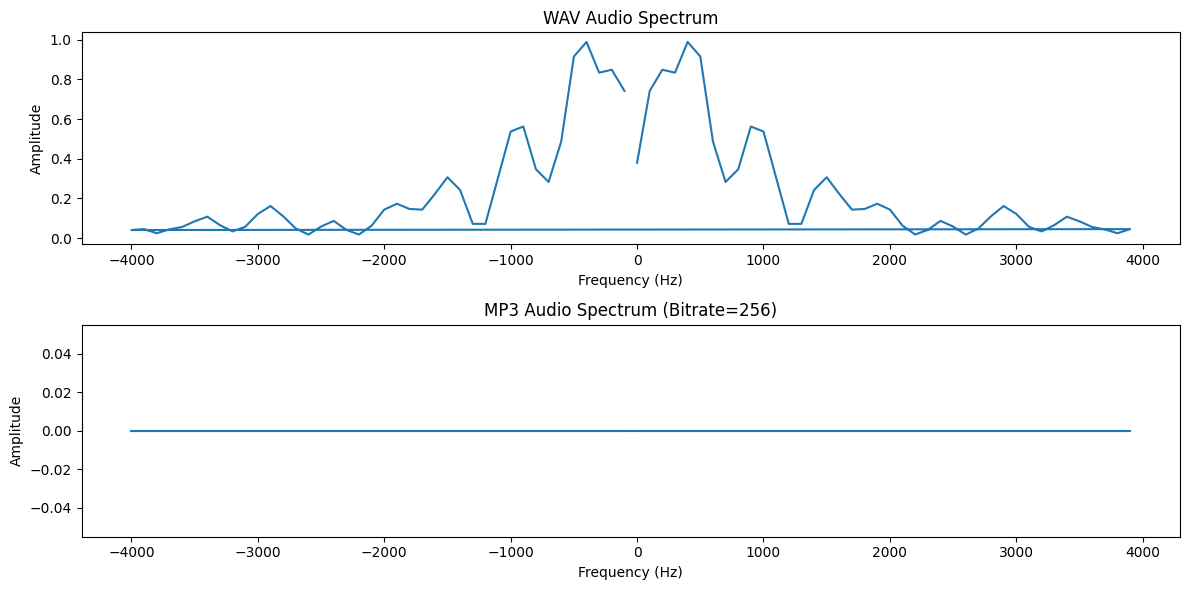

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from pydub import AudioSegment

def mp3_to_array(mp3_path, bitrate=192):  # Specify the bitrate here
    audio = AudioSegment.from_mp3(mp3_path)
    audio = audio.set_frame_rate(44100)  # Set a common frame rate for compatibility
    audio = np.array(audio.get_array_of_samples())
    return audio

# Read the WAV file
#fs1, audio1 = wavfile.read('overlapped_audio_normalized.wav')

# Read the MP3 file using specified bitrate

fs1, audio1 = wavfile.read('/content/gdrive/MyDrive/Rekovar data/Combined/02c3b725-26e4-4a2c-9336-04ddc58836d9-1430726196216-1.7-m-04-hu.wav')

# Read the MP3 file using pydub
#audio2 = AudioSegment.from_mp3('/content/gdrive/MyDrive/Rekovar data/en/clips/common_voice_en_33164035.mp3')
audio2 = mp3_to_array('/content/gdrive/MyDrive/Rekovar data/en/clips/common_voice_en_33164035.mp3', bitrate=256)  # Specify the bitrate you want

# Normalize the audio data to the range [-1, 1]
audio1_normalized = audio1 / np.max(np.abs(audio1), axis=0)
audio2_normalized = audio2 / np.max(np.abs(audio2), axis=0)

# Trim or zero-pad the first 10 milliseconds
samples_to_visualize = int(fs1 * 0.01)  # 10ms
audio1_trimmed = audio1_normalized[:samples_to_visualize]
audio2_trimmed = audio2_normalized[:samples_to_visualize]

# Create time axis
time_axis = np.arange(0, len(audio1_trimmed)) / fs1

# Compute FFT for both signals
fft_audio1 = np.fft.fft(audio1_trimmed)
fft_audio2 = np.fft.fft(audio2_trimmed)

# Frequency axis
freq = np.fft.fftfreq(samples_to_visualize, d=1/fs1)

# Plot the spectra
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq, np.abs(fft_audio1))
plt.title('WAV Audio Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_audio2))
plt.title('MP3 Audio Spectrum (Bitrate=256)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [ ]:
from pydub import AudioSegment

def mp3_to_wav(mp3_path, wav_path):
    # Read the MP3 file
    audio = AudioSegment.from_mp3(mp3_path)

    # Convert to WAV
    audio.export(wav_path, format="wav")

# Example usage
mp3_file_path = '/content/gdrive/MyDrive/Rekovar data/en/clips/common_voice_en_33178965.mp3'
wav_file_path = 'sample_converted.wav'

mp3_to_wav(mp3_file_path, wav_file_path)

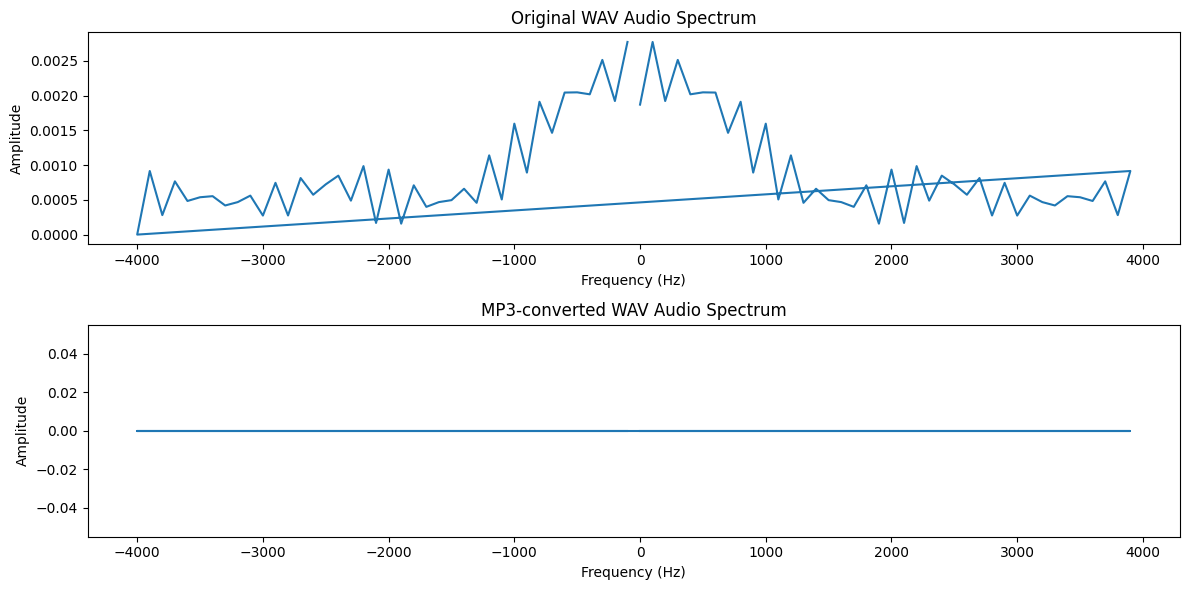

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

# Read the WAV files
fs_wav, audio_wav = wavfile.read('/content/gdrive/MyDrive/Rekovar data/Combined/06c4cfa2-7fa6-4fda-91a1-ea186a4acc64-1430029237378-1.7-f-26-ti.wav')
fs_mp3_converted, audio_mp3_converted = wavfile.read('sample_converted.wav')

# Normalize the audio data to the range [-1, 1]
audio_wav_normalized = audio_wav / np.max(np.abs(audio_wav), axis=0)
audio_mp3_converted_normalized = audio_mp3_converted / np.max(np.abs(audio_mp3_converted), axis=0)

# Trim or zero-pad the first 10 milliseconds
samples_to_visualize = int(fs_wav * 0.01)  # 10ms
audio_wav_trimmed = audio_wav_normalized[:samples_to_visualize]
audio_mp3_converted_trimmed = audio_mp3_converted_normalized[:samples_to_visualize]

# Create time axis
time_axis = np.arange(0, len(audio_wav_trimmed)) / fs_wav

# Compute FFT for both signals
fft_audio_wav = np.fft.fft(audio_wav_trimmed)
fft_audio_mp3_converted = np.fft.fft(audio_mp3_converted_trimmed)

# Frequency axis
freq = np.fft.fftfreq(samples_to_visualize, d=1/fs_wav)

# Plot the spectra
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq, np.abs(fft_audio_wav))
plt.title('Original WAV Audio Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_audio_mp3_converted))
plt.title('MP3-converted WAV Audio Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
